In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Motivation

During my master studies working through assignments in probability theory I spend a lot of time struggling with a task, which seemed to be very easy at the first glance. Here it is:

<div class="alert alert-block alert-info">
Given two independent uniformly distributed random variables $X$ and $Y$ (i.e. $X ⊥ Y, X,Y \sim U([0,1 ])$), determine the probability density function p(z) of $Z=X+Y$.
</div>

After a quick web search I found the theoretical tool, which is required need to accomplish the task - [Convolution of probability distributions](https://en.wikipedia.org/wiki/Convolution_of_probability_distributions). It states:

<div class="alert alert-block alert-info">
The general formula for the distribution of the sum $Z=X+Y$ of two independent integer-valued (and hence discrete) random variables is
  
\begin{equation}
P(Z=z) = \sum_{k=-\infty}^\infty P(X=k)P(Y=z-k)
\end{equation}

The counterpart for independent continuously distributed random variables with density functions $f, g$ is

\begin{equation}
h(z)=(f*g)(z)=\int_{-\infty}^\infty f(z-t)g(t) dt = \int_{-\infty}^\infty f(t)g(z-t) dt
\end{equation}
</div>

My first thought was "oh, I saw those integrals back in control theory lectures years ago" - but years went by and I had no idea anymore how the integral 

\begin{equation}
(f*g)(z) = \int_{-\infty}^\infty f(t)g(z-t) dt
\end{equation}

is calculated - there are some fancy visualitions in wikipedia like this one, but for me it was hard to decipher the meaning of the different variables within the equation.

The goal of this blogpost is to go step by step over the basics - in the end you should feel comfortable with convolutions plus you could calculate them in Python, too.

Enjoy!

# Basics

## Altering fuction graphs

You probably had this chapter in school, teachers do that usually with quadratic functions. If you know what happens for function $f$ if you alter $f(x)$ to $f(-x+3)$ feel free to skip this section.

The motivation of all this is to understand the term $g(z-x)$ which is changed from $g(x)$. Note that, I replaced the $t$ with $x$ in order not to confuse the reader with $t$ as time.

Let's define two simple functions to work through this tutorial. The first will be a simple quadratic function 

\begin{equation}
f_1(x)=x^2
\end{equation}

As I want to solve my task, too - we will have a uniform distribution $U$ as our second function

\begin{equation}
f_2(x)=\begin{cases}
    \frac{1}{b - a} & \mathrm{for}\ a \le x \le b, \\[8pt]
    0 & \mathrm{for}\ x<a\ \mathrm{or}\ x>b
\end{cases}
\end{equation}

Let's implement them in Python:

In [2]:
def f1(x):
    return x**2

In [3]:
def f2(x, a, b):
    const = 1/(b-a)
    if a <= x and x <= b:
        return const
    else:
        return 0

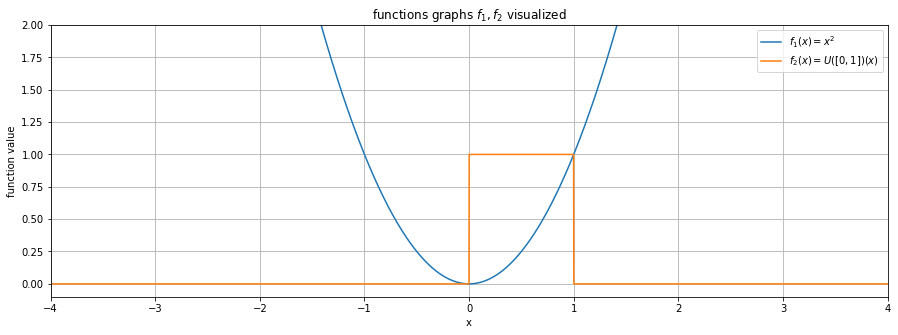

In [4]:
x_vec = np.linspace(-10, 10, 10000)
f1_vec = f1(x_vec)
f2_vec = np.asarray([f2(x, 0, 1) for x in np.nditer(x_vec)])

plt.figure(figsize=(15,5))
plt.plot(x_vec, f1_vec, label="$f_1(x)=x^2$")
plt.plot(x_vec, f2_vec, label="$f_2(x)=U([0, 1])(x)$")
plt.xlim([-4, 4])
plt.ylim([-0.1, 2])
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("function value")
plt.title("functions graphs $f_1, f_2$ visualized")
plt.savefig("001_f1_and_f2.png", dpi=300)

Now what happens when we add a constant $z$ to the function argument (i.e. $f(x+3)$)? Let's see what happens for different values of $z$.

In [5]:
k_array = [-2, 1]

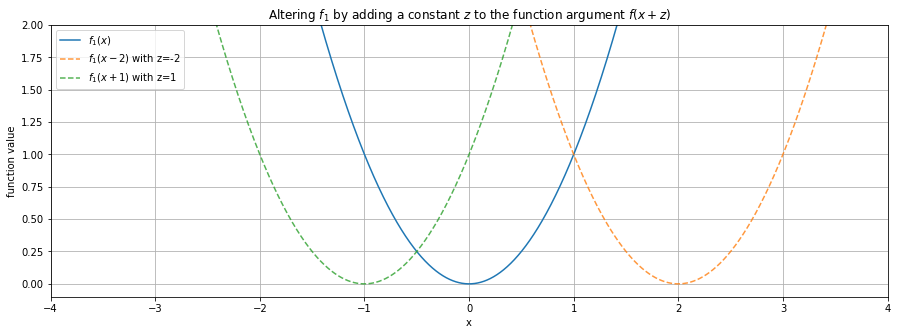

In [6]:
x_vec = np.linspace(-10, 10, 10000)

plt.figure(figsize=(15,5))
plt.plot(x_vec, f1(x_vec), label="$f_1(x)$")
for k in k_array:
    label_text = "$f_1(x%+d)$ with z=%d"%(k,k)
    plt.plot(x_vec, f1(x_vec+k), label=label_text, alpha=0.8, ls="--")
plt.xlim([-4, 4])
plt.ylim([-0.1, 2])
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("function value")
plt.title("Altering $f_1$ by adding a constant $z$ to the function argument $f(x+z)$")
plt.savefig("002_f1_shift_z.png", dpi=300)

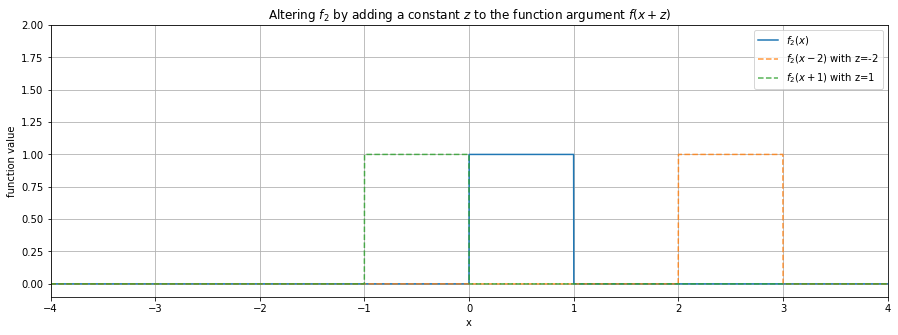

In [7]:
x_vec = np.linspace(-10, 10, 10000)
f2_vec = np.asarray([f2(x, 0, 1) for x in np.nditer(x_vec)])

plt.figure(figsize=(15,5))
plt.plot(x_vec, f2_vec, label="$f_2(x)$")
for k in k_array:
    label_text = "$f_2(x%+d)$ with z=%d"%(k,k)
    f2_vec = np.asarray([f2(x, 0-k, 1-k) for x in np.nditer(x_vec)])
    plt.plot(x_vec, f2_vec, label=label_text, alpha=0.8, ls="--")
plt.xlim([-4, 4])
plt.ylim([-0.1, 2])
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("function value")
plt.title("Altering $f_2$ by adding a constant $z$ to the function argument $f(x+z)$")
plt.savefig("003_f2_shift_z.png", dpi=300)

Adding a positive number $z$, we shift the graph to the left, with a negative $z$ to the right.

What happens if we multiply $-1$ to the function argument $x$?

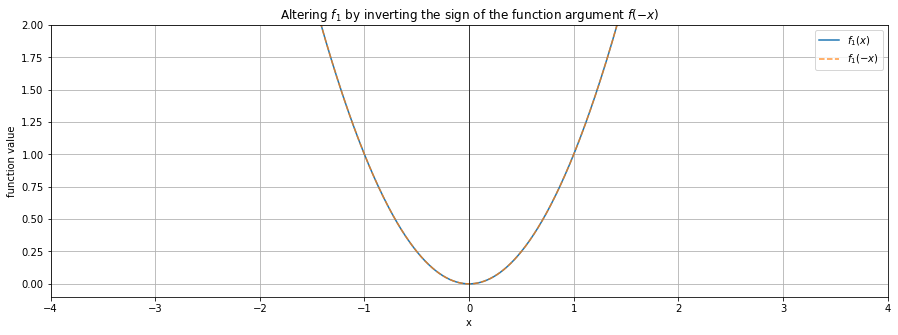

In [8]:
x_vec = np.linspace(-10, 10, 10000)

plt.figure(figsize=(15,5))
plt.plot(x_vec, f1(x_vec), label="$f_1(x)$")

label_text = "$f_1(-x)$"
plt.plot(x_vec, f1(-x_vec), label=label_text, alpha=0.8, ls="--")
plt.xlim([-4, 4])
plt.ylim([-0.1, 2])
plt.axvline(0, color="k", linewidth=0.7)
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("function value")
plt.title("Altering $f_1$ by inverting the sign of the function argument $f(-x)$")
plt.savefig("004_f1_invert_x.png", dpi=300)

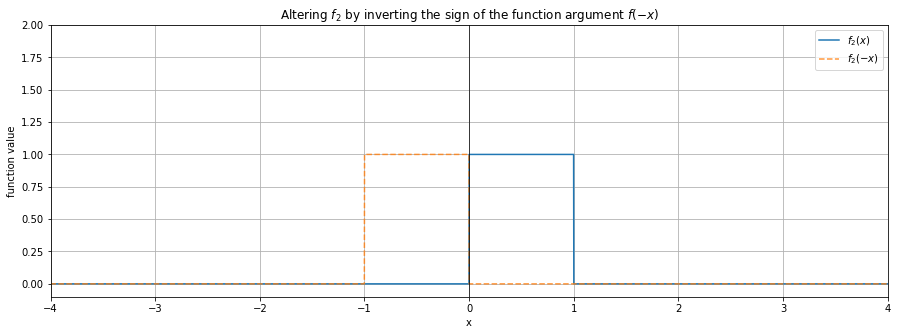

In [9]:
x_vec = np.linspace(-10, 10, 10000)
f2_vec = np.asarray([f2(x, 0, 1) for x in np.nditer(x_vec)])

plt.figure(figsize=(15,5))
plt.plot(x_vec, f2_vec, label="$f_2(x)$")

label_text = "$f_2(-x)$"
f2_vec_minus = np.asarray([f2(x, -1, 0) for x in np.nditer(x_vec)])
plt.plot(x_vec, f2_vec_minus, label=label_text, alpha=0.8, ls="--")
plt.xlim([-4, 4])
plt.ylim([-0.1, 2])
plt.grid()
plt.legend()
plt.axvline(0, color="k", linewidth=0.7)
plt.xlabel("x")
plt.ylabel("function value")
plt.title("Altering $f_2$ by inverting the sign of the function argument $f(-x)$")
plt.savefig("005_f2_invert_x.png", dpi=300)

Apperently, this change "mirrors" the function graph on the y-axis.

Now we can understand the tranformation $g(t)$ to $g(z-t)$. It is adding a constant $z$ and multiplying $-1$ to $t$.

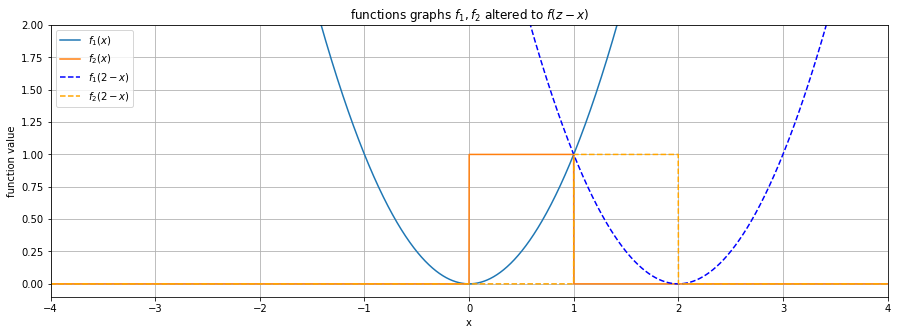

In [10]:
x_vec = np.linspace(-10, 10, 10000)
f1_vec = f1(-x_vec+2)
f2_vec = np.asarray([f2(-x, 0-2, 1-2) for x in np.nditer(x_vec)])

plt.figure(figsize=(15,5))

f1_vec = f1(x_vec)
f2_vec = np.asarray([f2(x, 0, 1) for x in np.nditer(x_vec)])
plt.plot(x_vec, f1_vec, label="$f_1(x)$")
plt.plot(x_vec, f2_vec, label="$f_2(x)$")

"""
f1_vec = f1(x_vec+2)
f2_vec = np.asarray([f2(x, 0-2, 1-2) for x in np.nditer(x_vec)])
plt.plot(x_vec, f1_vec, label="$f_1(2+x)$", color="blue", ls="-.")
plt.plot(x_vec, f2_vec, label="$f_2(2+x)$", color="orange", ls="-.")
"""
f1_vec = f1(-x_vec+2)
f2_vec = np.asarray([f2(-x, 0-2, 1-2) for x in np.nditer(x_vec)])
plt.plot(x_vec, f1_vec, label="$f_1(2-x)$", color="blue", ls="--")
plt.plot(x_vec, f2_vec, label="$f_2(2-x)$", color="orange", ls="--")
plt.xlim([-4, 4])
plt.ylim([-0.1, 2])
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("function value")
plt.title("functions graphs $f_1, f_2$ altered to $f(z-x)$")
plt.savefig("006_f1_f2_altered.png", dpi=300)

## Multiplying two functions

Let's continue to work through the convolution calculation formula - our next task is to undestand the product of two functions (or in my case density distributions):

\begin{equation}
f(x)g(z-x)
\end{equation}

What happens if we multiply them? 

Let's define a proxy function $a$ as a product of $f_2(x)$ and $f_2(0.5-x)$ and visualize it

\begin{equation}
a(x) = f_2(x)f_2(0.5-x)
\end{equation}

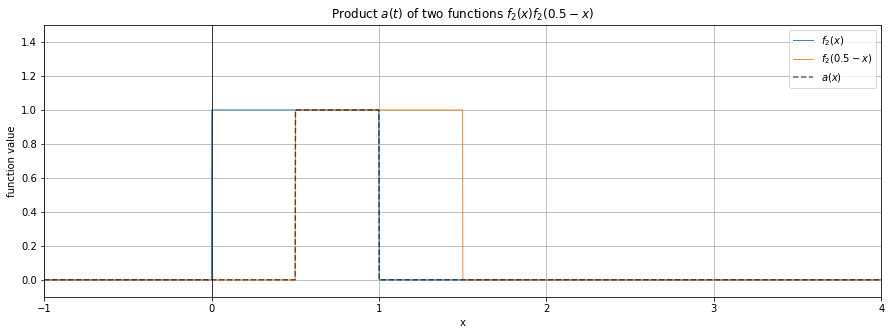

In [11]:
x_vec = np.linspace(-10, 10, 10000)
f2_vec = np.asarray([f2(x, 0, 1) for x in np.nditer(x_vec)])

plt.figure(figsize=(15,5))
plt.plot(x_vec, f2_vec, label="$f_2(x)$", linewidth=0.9)

label_text = "$f_2(0.5-x)$"
f2_vec2 = np.asarray([f2(-x, -1.5, -0.5) for x in np.nditer(x_vec)])
plt.plot(x_vec, f2_vec2, label=label_text, linewidth=0.9)

h_t = np.multiply(f2_vec, f2_vec2)
plt.plot(x_vec, h_t, label="$a(x)$", alpha=0.6, ls="--", color="k")
plt.xlim([-1, 4])
plt.ylim([-0.1, 1.5])
plt.grid()
plt.legend()
plt.axvline(0, color="k", linewidth=0.7)
plt.xlabel("x")
plt.ylabel("function value")
plt.title("Product $a(t)$ of two functions $f_2(x)f_2(0.5-x)$")
plt.savefig("007_a_x_f1_f2_multiplied.png", dpi=300)

The black dotted graph is the product we we integrate on in the next step.

## Integral

An integral is the area between the function graph and the x-axis. This is the last part of our convolution equation

\begin{equation}
\int_{-\infty}^\infty a(x) dx = \int_{-\infty}^\infty f(x)g(z-x) dx
\end{equation}

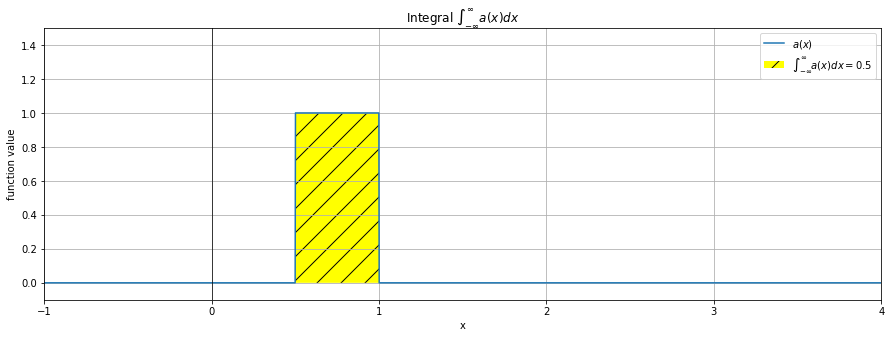

In [12]:
f2_vec = np.asarray([f2(x, 0, 1) for x in np.nditer(x_vec)])
f2_vec2 = np.asarray([f2(-x, -1.5, -0.5) for x in np.nditer(x_vec)])
h_t = np.multiply(f2_vec, f2_vec2)

plt.figure(figsize=(15,5))
plt.plot(x_vec, h_t, label="$a(x)$", ls="-")

plt.fill_between(x_vec, 0, h_t, hatch="/", facecolor='yellow', label="$\int_{-\infty}^\infty a(x) dx = 0.5$")
plt.xlim([-1, 4])
plt.ylim([-0.1, 1.5])
plt.grid()
plt.legend()
plt.axvline(0, color="k", linewidth=0.7)
plt.xlabel("x")
plt.ylabel("function value")
plt.title("Integral $\int_{-\infty}^\infty a(x) dx$")
plt.savefig("008_a_x_integrated.png", dpi=300)

# Building blocks in one picture

## Principle

Now we are ready to understand the convolution equation

\begin{equation}
h(z) = (f*g)(z) = \int_{-\infty}^\infty f(x)g(z-x) dx
\end{equation}

In order to calculate $h(z)$ for a particular $z$ we have to do following steps:

1. Shift function $g(x)$ to the left $z$, i.e. $g(x+z)$
2. Mirror the result relative to the y-axis, i.e. $g(-x+z)=g(z-x)$
3. Calculate the product of $f(x)g(z-x)=a(x)$
4. Calculate the infinite integral over $a(x) = i_z$
5. The result of the convolution at particulat position $z$ is $i_z$, i.e. we calculated $h(z)=\int_{-\infty}^\infty f(x)g(z-x) dx$.

## Back to homework

Now I believe we can solve our random variable sum assignment $Z=X+Y$:

\begin{equation}
p_Z(Z=z)=\int_{-\infty}^\infty p_X(X=(z-x))p_Y(Y=x) dx
\end{equation}

Let's apply our algorithm developed above and see what will be the result.

In [13]:
from scipy.integrate import trapz

In [14]:
def p_Z(z):
    x_vec = np.linspace(-5, 5, 1000)
    px_vec = np.asarray([f2(x, 0, 1) for x in np.nditer(x_vec)])
    py_vec_altered = np.asarray([f2(-x, 0-z, 1-z) for x in np.nditer(x_vec)])
    a_x = np.multiply(px_vec, py_vec_altered)
    return trapz(a_x, x_vec)

In [15]:
z_vec = np.linspace(-1, 3, 200)
pz_vec= np.asarray([p_Z(x) for x in np.nditer(z_vec)])

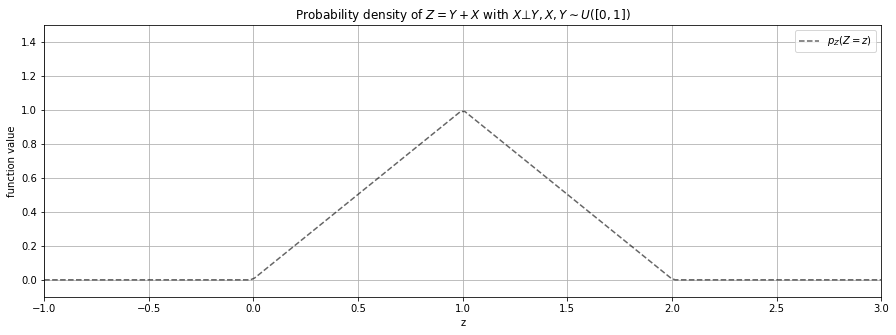

In [16]:
plt.figure(figsize=(15,5))
plt.plot(z_vec, pz_vec, label="$p_Z(Z=z)$", alpha=0.6, ls="--", color="k")
plt.xlim([-1, 3])
plt.ylim([-0.1, 1.5])
plt.grid()
plt.legend()
#plt.axvline(0, color="k", linewidth=0.7)
plt.xlabel("z")
plt.ylabel("function value")
plt.title("Probability density of $Z=Y+X$ with $X ⊥ Y, X,Y \sim U([0,1 ])$")
plt.savefig("009_px_py_convolution.png", dpi=300)

Nice! We can see that the sum of two equally distributed random variables will lead to a triangle formed probability density! It also sounds natural because the expected value of $X$ and $Y$ are both $0.5$ - so the expected value of $Z$ (the focal point of the density) will be at $z=1$!